In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import errorcode
from urllib.parse import quote_plus
from sqlalchemy import create_engine

In [2]:
config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Physic955',
    'database': 'Basketball_Reference'
}

password = quote_plus("Physic955")
engine = create_engine(
    f"mysql+mysqlconnector://{config['user']}:{password}@{config['host']}/{config['database']}"
)

In [3]:
query_mvp = """
    SELECT p.Name, p.Height, s.Season
    FROM michael_jordan_trophy mjt
    JOIN players p ON mjt.PlayerID = p.PlayerID
    JOIN seasons s ON mjt.SeasonID = s.SeasonID
    WHERE s.Season IN ('2019-20','2020-21','2021-22','2022-23','2023-24')
    ORDER BY s.Season, p.Height DESC;
"""
df_mvp_players = pd.read_sql(query_mvp, engine)
print(df_mvp_players)

                       Name  Height   Season
0     Giannis Antetokounmpo     211  2019-20
1              Nikola Jokić     211  2019-20
2             Anthony Davis     208  2019-20
3              LeBron James     206  2019-20
4             Pascal Siakam     203  2019-20
..                      ...     ...      ...
56             Jayson Tatum     203  2023-24
57              Luka Dončić     198  2023-24
58  Shai Gilgeous-Alexander     198  2023-24
59          Anthony Edwards     193  2023-24
60            Jalen Brunson     188  2023-24

[61 rows x 3 columns]


In [4]:
with mysql.connector.connect(**config) as cnxn:
        query = """
            SELECT p.Name, p.Height, s.Season, pr.Rank
            FROM player_ranks pr
            JOIN players p ON pr.PlayerID = p.PlayerID
            JOIN seasons s ON pr.SeasonID = s.SeasonID
            WHERE s.Season >= '2019-20' AND pr.Rank <= 50
            ORDER BY s.Season, pr.Rank;
        """
        df_top50_height = pd.read_sql(query, cnxn)
print(df_top50_height)

                      Name  Height   Season  Rank
0             James Harden     196  2019-20     1
1           Damian Lillard     188  2019-20     2
2             Devin Booker     198  2019-20     3
3    Giannis Antetokounmpo     211  2019-20     4
4               Trae Young     185  2019-20     5
..                     ...     ...      ...   ...
295           Desmond Bane     196  2024-25    46
296            Evan Mobley     211  2024-25    47
297          Norman Powell     190  2024-25    48
298          Miles Bridges     201  2024-25    49
299          Julius Randle     206  2024-25    50

[300 rows x 4 columns]


C:\Users\Asus\AppData\Local\Temp\ipykernel_23620\1090559510.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top50_height = pd.read_sql(query, cnxn)


In [5]:
Nan_mvp = df_mvp_players[df_mvp_players['Height'].isna()]['Name'].tolist()
print("NaN in MVP Players Height:", Nan_mvp)

Nan_top50 = df_top50_height[df_top50_height['Height'].isna()]['Name'].tolist()
print("NaN in Top 50 Players Height:", Nan_top50)

NaN in MVP Players Height: []
NaN in Top 50 Players Height: []


In [6]:
print('mvp_list describe: ')
mvp_stats = df_mvp_players['Height'].describe()
print('\n')
print(mvp_stats)
print('\n')
print('\n')
print('top_50th describe: ')
print('\n')
top50_stats = df_top50_height['Height'].describe()
print(top50_stats)


mvp_list describe: 


count     61.000000
mean     200.295082
std        9.374334
min      183.000000
25%      193.000000
50%      201.000000
75%      211.000000
max      216.000000
Name: Height, dtype: float64




top_50th describe: 


count    300.000000
mean     198.483333
std        8.321491
min      183.000000
25%      193.000000
50%      198.000000
75%      206.000000
max      221.000000
Name: Height, dtype: float64


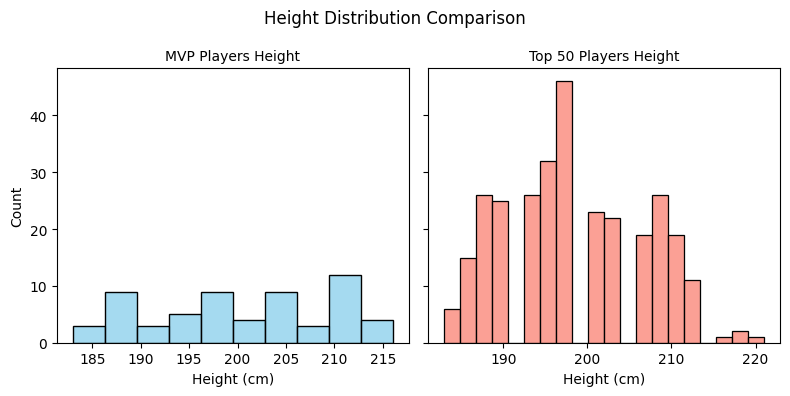

C:\Users\Asus\AppData\Local\Temp\ipykernel_23620\3950867788.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_height, x='Group', y='Height', palette=['skyblue', 'salmon'], width=0.5)


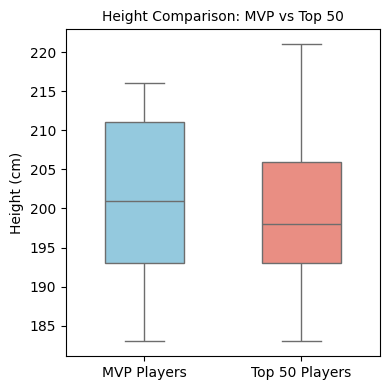

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
sns.histplot(df_mvp_players['Height'], bins=10, color='skyblue', ax=axes[0], kde=False, edgecolor='black')
axes[0].set_title('MVP Players Height', fontsize=10)
axes[0].set_xlabel('Height (cm)')
axes[0].set_ylabel('Count')

sns.histplot(df_top50_height['Height'], bins=20, color='salmon', ax=axes[1], kde=False, edgecolor='black')
axes[1].set_title('Top 50 Players Height', fontsize=10)
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('')

fig.suptitle('Height Distribution Comparison', fontsize=12)
plt.tight_layout()
plt.savefig('height_histogram.png')
plt.show()


plt.figure(figsize=(4, 4))
df_height = pd.DataFrame({
    'Height': list(df_mvp_players['Height']) + list(df_top50_height['Height']),
    'Group': ['MVP Players'] * len(df_mvp_players) + ['Top 50 Players'] * len(df_top50_height)
})
sns.boxplot(data=df_height, x='Group', y='Height', palette=['skyblue', 'salmon'], width=0.5)
plt.title('Height Comparison: MVP vs Top 50', fontsize=10)
plt.ylabel('Height (cm)')
plt.xlabel('')
plt.grid(False)
plt.tight_layout()
plt.savefig('height_boxplot.png')
plt.show()

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    میانگین قد
  </p>
  <p>
    بازیکن‌های MVP (top voters) به‌طور میانگین قد بلندتری دارن (حدود 200.30 سانتی‌متر) نسبت به ۵۰ بازیکن برتر (حدود 198.48 سانتی‌متر).
    این اختلاف حدود 1.82 سانتی‌متر از هیستوگرام‌ها و باکس‌پلات قابل مشاهده است، که اوج فرکانس قد در MVPها حدود 201-211 سانتی‌متر و
    در ۵۰ بازیکن برتر حدود 198-206 سانتی‌متر قرار داره.
    این نشون می‌ده قد بلندتر می‌تونه معیاری برای برجستگی تو نقش MVP باشه.
  </p>
</div>

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto; margin-top:15px;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    تنوع
  </p>
  <p>
    هر دو گروه تنوع مشابهی تو توزیع قد دارن، اما MVPها به سمت قدهای بلندتر متمایلن.
    تو باکس‌پلات، ربع بالایی (۷۵٪) قدهای MVPها تا 211 سانتی‌متر کشیده شده،
    در حالی که تو ۵۰ بازیکن برتر این مقدار تا 206 سانتی‌متره.
    هیستوگرام هم این رو تأیید می‌کنه، چون دم بلندتر (tail) تو سمت چپ (قدهای کوتاه‌تر) تو هر دو گروه کمه، 
    ولی تو MVPها دم سمت راست (قدهای بلندتر) پررنگ‌تره.
  </p>
</div>

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto; margin-top:15px;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    تأثیر
  </p>
  <p>
    این تحلیل نشون می‌ده قد توی موفقیت برای کسب جایزه MVP (impact کلی) نقش مهم‌تری نسبت به رتبه‌بندی صرف یا امتیازدهی (PTS) داره. 
    با توجه به اینکه ۵۰ بازیکن برتر بر اساس رتبه انتخاب شدن، ولی MVPها اغلب قد بلندتری دارن، 
    می‌تونیم نتیجه بگیریم که قد به‌عنوان یه مزیت فیزیکی، 
    تو تأثیرگذاری کلی بازیکن (مثل دفاع، ریباند، یا حضور در زمین) نقش کلیدی داره 
    و ممکنه تو انتخاب MVP توسط رأی‌دهندگان تأثیر بیشتری داشته باشه.
  </p>
</div>